## Random Walks

Use a biased coin to simulate a random walk of 30 steps on the line. If the coin falls heads (H), take one step to the right, if it lands tails (T ), take one step left. After 30 steps, note the final position. Take Pr(H) = 0.6 and Pr(T) = 0.4. (a) Plot a sample path. (b) Make a histogram for 200 such random walks. (c) Report the sample mean. (d) Report the sample variance. (What should these be exactly?)


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

def randomwalk(phead = 0.5, steps = 30):
    pos = 0
    hist = []
    for _ in range(steps):        
        pos += 1 if random.random() < 0.6 else  - 1
        hist.append(pos)
    return hist

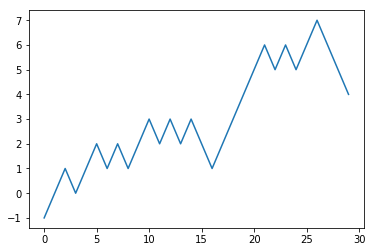

In [2]:
plt.plot(randomwalk())
plt.show()

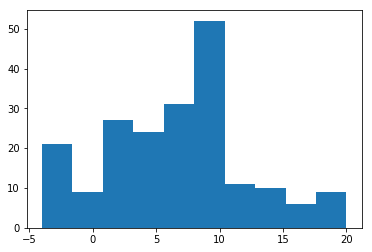

The mean of the final location is 6.32
The variance of the final location is 29.897599999999994


In [3]:
walks = [randomwalk()[-1] for i in range(200)]

plt.hist(walks)
plt.show()
print(f"The mean of the final location is {np.mean(walks)}")
print(f"The variance of the final location is {np.var(walks)}")

(Gambler’s ruin with time limits) Modify the simulation code in Section 1.1.3 starting on page 8 for the gambler’s ruin problem, but with various upper bounds on the iteration count. How does this bias the average duration of the game? How does this bias the sample variance?

In [4]:
def gamblers_ruin(limit = None):
    gambler = [100]
    house = [2000]
    
    n = 0
    while gambler[-1] > 0 and house[-1] > 0 and (not limit or n < limit):
        if random.random() < .5:
            gambler.append(gambler[-1] + 1)
            house.append(gambler[-1] - 1)
        else:
            gambler.append(gambler[-1] - 1)
            house.append(gambler[-1] + 1) 
        n += 1
    return n

In [5]:
gamblers_ruin()

3100

Bound: 100 Mean: 100.00 Variance: 0 Mean to UB: 1.00 Var to UB: 0.00


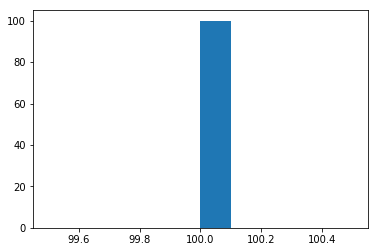

In [ ]:
for i in np.logspace(2, 7,num=7-2+1,base=10, dtype = 'int'):
    x = [gamblers_ruin(i) for _ in range(100)]
    nobs, minmax, mean, var, skew, kurt = ss.describe(x)
    print(f"Bound: {i} Mean: {mean:.2f} Variance: {var:.0f} Mean to UB: {mean/i:.2f} Var to UB: {var/i:.2f}")
    plt.hist(x)
    plt.show()